Plot metrics


In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/home/m.caros/work/3DSemanticSegmentation')
from utils.utils import *
from utils.utils_plot import *
from utils.get_metrics import *


In [2]:
iou_types = ['Tower IoU', 'Lines IoU', 'Wind IoU', 'Mean IoU']

model_data = {}

In [3]:

# Step 1: Load all CSV files
csv_files = glob.glob("/home/m.caros/work/3DSemanticSegmentation/src/LoRA/metrics/results_RIB/*.csv")  # Adjust this path to your files
results = {}
print(f'Length files: {len(csv_files)}')

# Step 2: Calculate weighted IoU for each file
for file in csv_files:
    try:
        model_name = file.split("/")[-1].replace(".csv", "")
        df = pd.read_csv(file)

        df = df.sort_values(by='Tile').reset_index(drop=True)

        # Replace "nan" with actual NaN values for calculations
        df = df[['Surrounding IoU', 'Tower IoU', 'Lines IoU', 'Mean IoU', 'points surr', 'points tower','points lines']].replace("nan", pd.NA).astype(float)  # Convert "nan" to NaN for calculations
        model_data[model_name] = df
        
        # Weighted IoU calculations
        surr_weighted_iou = (df['Surrounding IoU'] * df['points surr']).sum() / df['points surr'].sum()
        tower_weighted_iou = (df['Tower IoU'] * df['points tower']).sum() / df['points tower'].sum()
        lines_weighted_iou = (df['Lines IoU'] * df['points lines']).sum() / df['points lines'].sum()
        # crane_weighted_IoU = (df['Crane IoU'] * df['crane points']).sum() / df['crane points'].sum()
        # wind_turbine_weighted_iou = (df['Wind IoU'] * df['points wind']).sum() / df['points wind'].sum()
        # mean_iou = (surr_weighted_iou + tower_weighted_iou + lines_weighted_iou + wind_turbine_weighted_iou)/4.
        mean_iou = np.nanmean([surr_weighted_iou , tower_weighted_iou , lines_weighted_iou])
        
        # Store results in dictionary
        results[model_name] = {
            'Surrounding IoU': surr_weighted_iou,
            'Tower IoU': tower_weighted_iou,
            'Lines IoU': lines_weighted_iou,
            # 'Wind Turbine IoU': wind_turbine_weighted_iou,
            # 'Crane IoU': crane_weighted_IoU,
            'Mean IoU': mean_iou
        }
    except Exception as e:
        print(e)
        pass


Length files: 16


In [4]:
df.columns

Index(['Surrounding IoU', 'Tower IoU', 'Lines IoU', 'Mean IoU', 'points surr',
       'points tower', 'points lines'],
      dtype='object')

In [5]:
df

,Surrounding IoU,Tower IoU,Lines IoU,Mean IoU,points surr,points tower,points lines
0,99.991733,57.555342,NaN,78.773538,5334376.0,1002.0,0.0
1,99.986146,87.304891,90.708290,92.666442,3760112.0,1808.0,6700.0
2,99.974869,76.643100,91.826635,89.481535,4746181.0,3594.0,6583.0
3,99.986425,91.802749,93.455646,95.081607,5060390.0,5805.0,10465.0
4,99.967598,59.969088,86.379430,82.105372,3529741.0,2298.0,1418.0
5,99.994468,40.549273,NaN,70.271871,6633755.0,615.0,0.0
6,99.974856,91.511836,92.245502,94.577398,4863296.0,10131.0,8521.0
7,99.990927,65.969719,45.833333,70.597993,5157487.0,1377.0,36.0
8,99.992178,54.746835,NaN,77.369507,1828116.0,313.0,0.0



# Metrics comparison



In [6]:
df_results = pd.DataFrame(results).T  # Transpose for easier plotting
df_results.round(2).sort_values('Mean IoU')


,Surrounding IoU,Tower IoU,Lines IoU,Mean IoU
IoU-loraPN2_07-27-20:19_64R648000RIB,99.99,33.96,57.43,63.79
IoU-loraPN2_08-01-19:59_1R1alph168000RIB,99.99,60.06,64.30,74.79
IoU-loraPN2_07-31-11:15_2R2alph168000RIB,99.99,71.21,69.51,80.24
IoU-loraPN2_08-01-20:34_64R64alph168000RIB,99.99,68.61,72.90,80.50
IoU-loraPN2_07-28-09:49_8R8alph168000RIB,99.99,70.52,71.44,80.65
IoU-loraPN2_07-28-09:52_4R4alph168000RIB,99.99,70.99,72.37,81.12
IoU-loraPN2_07-31-10:13_32R32alph328000RIB,99.99,70.15,73.55,81.23
IoU-loraPN2_07-25-12:37_64R64alph168000RIB,99.99,71.99,74.11,82.03
IoU-loraPN2_08-01-10:07_32R32alph648000RIB,99.99,72.66,73.65,82.10
IoU-seg_04-29-18:01lr0001RIB,99.99,70.57,76.58,82.38


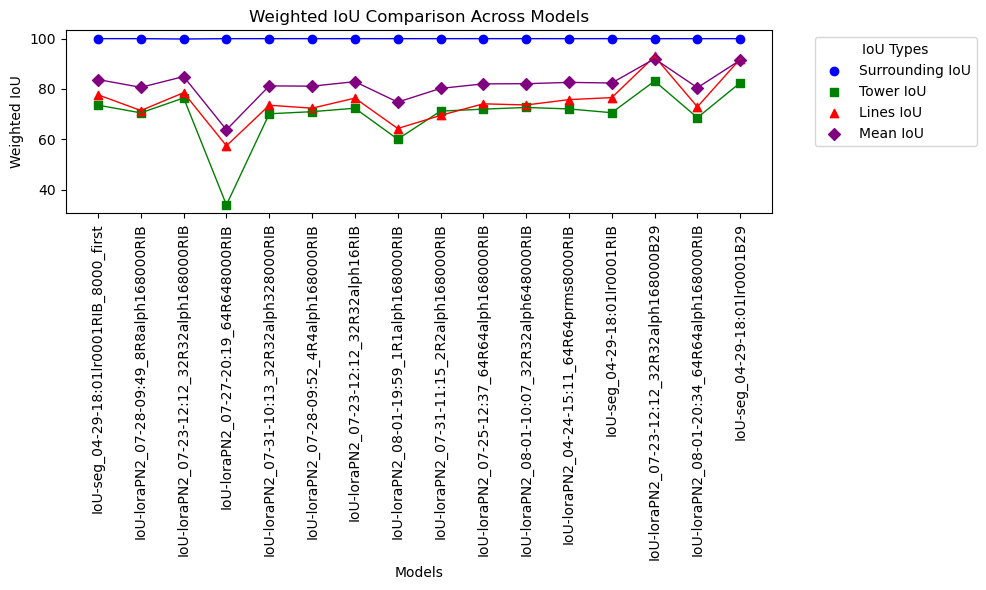

In [7]:
import matplotlib.pyplot as plt

# Assuming df_results is already defined and contains the weighted IoU values for each model

# Step 4: Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for each IoU type with connecting lines
for iou_type, color, marker in zip(df_results.columns, ['blue', 'green', 'red', 'purple'], ['o', 's', '^', 'D']):
    # Scatter plot for individual points
    ax.scatter(df_results.index, df_results[iou_type], color=color, marker=marker, label=iou_type)
    # Line plot to connect the points
    ax.plot(df_results.index, df_results[iou_type], color=color, linestyle='-', linewidth=1)

# Set plot labels and title
ax.set_title("Weighted IoU Comparison Across Models")
ax.set_ylabel("Weighted IoU")
ax.set_xlabel("Models")
plt.xticks(rotation=90)
plt.legend(title="IoU Types", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## Plot Confusion Matrix

### LoRA

In [ ]:
# files = 'CM_B29_8kp_seg_10-31-17*.txt' # large model 3 classes
# files = 'CM_B29_8kp_seg_11-15-09_*.txt' # best fine tuned model 4 classes
# files='CM_COSTA_8kp_loraPN2_11-20-12:53_16maxR_*txt'
# files='CM_COSTA_8kp_seg_11-19-15:11_FTcrane_sm_*txt'
# files='CM_COSTA_8kp_loraPN2_11-25-18:01_16RCosta_*'
# files='CM_COSTA_8kp_seg_11-26-09:42_noWind2augm1006k_*'
# files='CM_COSTA_8kp_loraPN2_11-27-11:53_16R_*'
files='*PN2_01-08-10:42_32R*'

path='/home/m.caros/work/3DSemanticSegmentation/src/LoRA/metrics/COSTA_filtered_height_results/confusion_matrices/'
cm_files = glob.glob(path + files)

In [ ]:
len(cm_files)

12

In [ ]:
import ast
N_CLASSES = 3

# Function to load a confusion matrix from a text file
def load_confusion_matrix(file_path):
    with open(file_path, 'r') as file:
        # Use ast.literal_eval to parse the string into a Python list
        matrix = ast.literal_eval(file.read().strip())
    return np.array(matrix, dtype=int)

# Function to ensure the matrix is 4x4 by adding a zero row and column for class 3
def ensure_shape(matrix):
    if matrix.shape == (N_CLASSES, N_CLASSES):
        return matrix
    new_matrix = np.zeros((N_CLASSES, N_CLASSES), dtype=int)
    for i in range(min(matrix.shape[0], N_CLASSES)):
        for j in range(min(matrix.shape[1],N_CLASSES)):
            new_matrix[i, j] = matrix[i, j]
    return new_matrix

# Aggregate confusion matrices
def aggregate_confusion_matrices(file_list):
    combined_matrix = np.zeros((N_CLASSES, N_CLASSES), dtype=int)
    for file in file_list:
        matrix = load_confusion_matrix(file)
        matrix = ensure_shape(matrix)
        combined_matrix += matrix
    return combined_matrix


In [ ]:
# Compute the combined confusion matrix
combined_matrix = aggregate_confusion_matrices(cm_files)
print("Combined Confusion Matrix:")
print(combined_matrix)

# Save the combined matrix if needed
# np.savetxt("combined_confusion_matrix.txt", combined_matrix, fmt='%d')


Combined Confusion Matrix:
[[88437281      933     1591]
 [    3527     9573      237]
 [     643      149     8076]]


Confusion matrix, without normalization


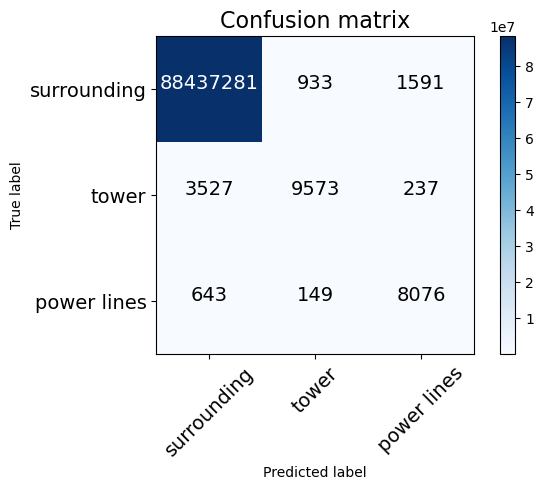

In [ ]:
show_confusion_matrix(combined_matrix, classes=['surrounding', 'tower', 'power lines'])


Normalized confusion matrix


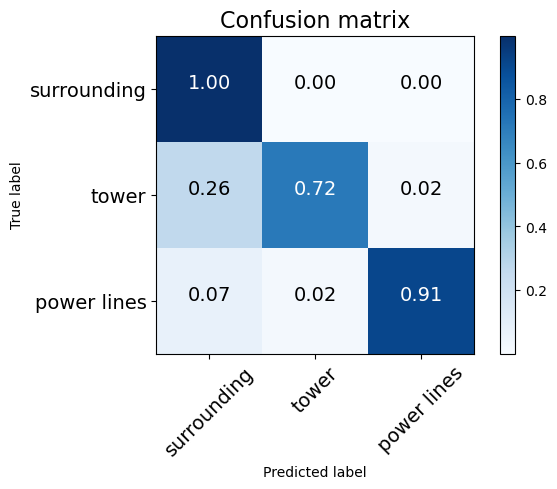

In [ ]:
show_confusion_matrix(combined_matrix, normalize=True, classes=['surrounding', 'tower', 'power lines'])


### Finetuning

In [ ]:
# files = 'CM_B29_8kp_seg_10-31-17*.txt' # large model 3 classes
# files = 'CM_B29_8kp_seg_11-15-09_*.txt' # best fine tuned model 4 classes
# files='CM_COSTA_8kp_loraPN2_11-20-12:53_16maxR_*txt'
# files='CM_COSTA_8kp_seg_11-19-15:11_FTcrane_sm_*txt'
# files='CM_COSTA_8kp_loraPN2_11-25-18:01_16RCosta_*'
# files='CM_COSTA_8kp_seg_11-26-09:42_noWind2augm1006k_*'
files='*12-05-10:49*'

cm_files = glob.glob(path + files)

In [ ]:
path

'/home/m.caros/work/3DSemanticSegmentation/src/LoRA/metrics/COSTA_filtered_height_results/confusion_matrices/'

In [ ]:
len(cm_files)

12

In [ ]:
import ast
N_CLASSES = 3

# Function to load a confusion matrix from a text file
def load_confusion_matrix(file_path):
    with open(file_path, 'r') as file:
        # Use ast.literal_eval to parse the string into a Python list
        matrix = ast.literal_eval(file.read().strip())
    return np.array(matrix, dtype=int)

# Function to ensure the matrix is 4x4 by adding a zero row and column for class 3
def ensure_shape(matrix):
    if matrix.shape == (N_CLASSES, N_CLASSES):
        return matrix
    new_matrix = np.zeros((N_CLASSES, N_CLASSES), dtype=int)
    for i in range(min(matrix.shape[0], N_CLASSES)):
        for j in range(min(matrix.shape[1],N_CLASSES)):
            new_matrix[i, j] = matrix[i, j]
    return new_matrix

# Aggregate confusion matrices
def aggregate_confusion_matrices(file_list):
    combined_matrix = np.zeros((N_CLASSES, N_CLASSES), dtype=int)
    for file in file_list:
        matrix = load_confusion_matrix(file)
        matrix = ensure_shape(matrix)
        combined_matrix += matrix
    return combined_matrix


In [ ]:
# Compute the combined confusion matrix
combined_matrix = aggregate_confusion_matrices(cm_files)
print("Combined Confusion Matrix:")
print(combined_matrix)

# Save the combined matrix if needed
# np.savetxt("combined_confusion_matrix.txt", combined_matrix, fmt='%d')


Combined Confusion Matrix:
[[88438027     1123       93]
 [    3467     9574      241]
 [    1655      442     6449]]


Confusion matrix, without normalization


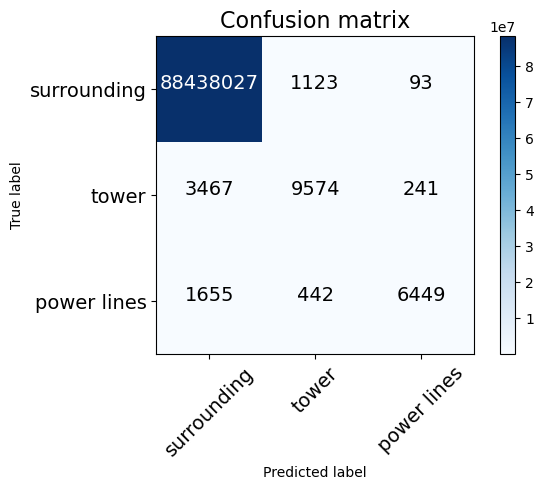

In [ ]:
show_confusion_matrix(combined_matrix, classes=['surrounding', 'tower', 'power lines'])


Normalized confusion matrix


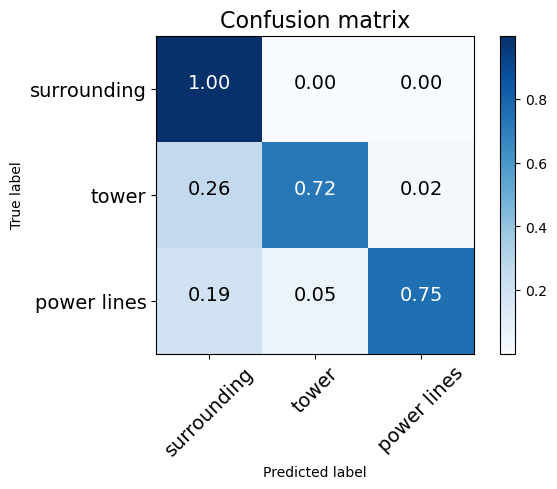

In [ ]:
show_confusion_matrix(combined_matrix, normalize=True, classes=['surrounding', 'tower', 'power lines'])
